In [61]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 50)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioAnalyser as pa

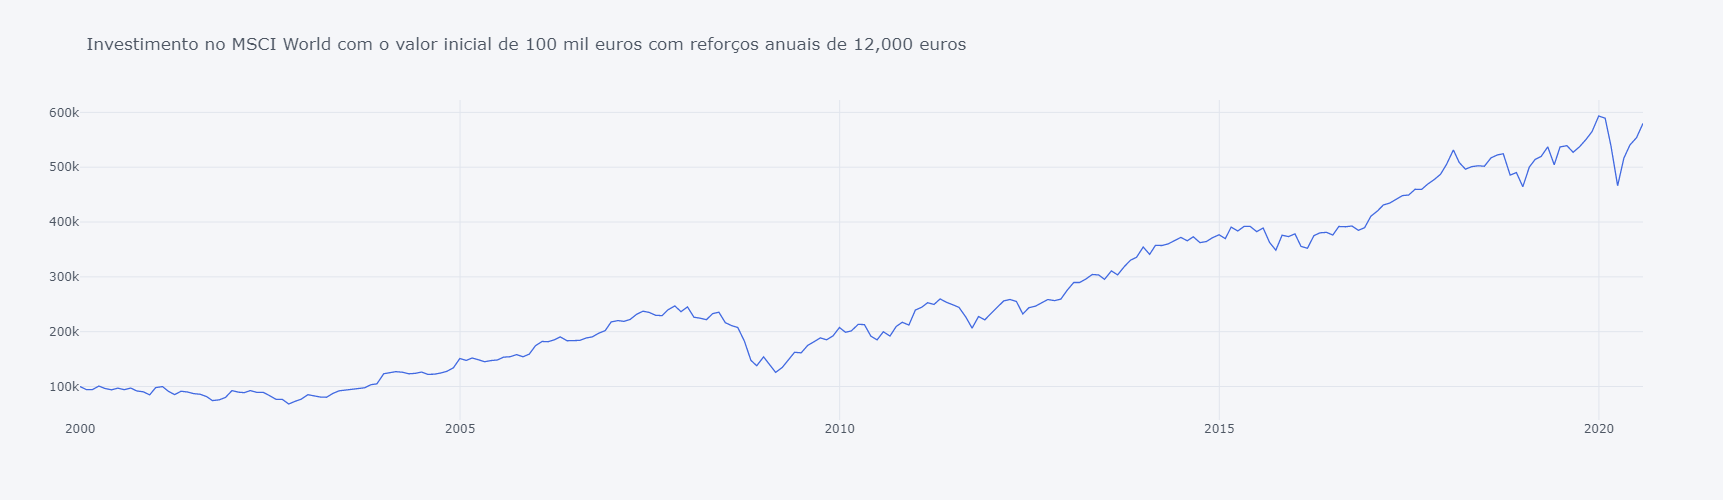

In [147]:
MSCI = pd.read_excel('MSCI_USD.xls').iloc[6:].dropna()

MSCI.columns = ['Date', 'MSCI']

# Convert the date column to datetime64
MSCI.Date = pd.to_datetime(MSCI.Date)

# Set date column as index
MSCI.set_index('Date', inplace=True)

# Set Period
MSCI = pa.normalize(MSCI['1999-12':])

# Set Year
MSCI['Year'] = MSCI.index.year

# Savings
MSCI['Savings'] = 1000
MSCI['Savings'] = MSCI['Savings'].cumsum()

# UPs
MSCI['UPs'] = 100000 / MSCI['MSCI'].iloc[0]

# Buy or hold
MSCI['Order'] = 'Order'

for i in range(MSCI.shape[0]):
    if MSCI['Year'].iloc[i] > MSCI['Year'].iloc[i-1]:
        MSCI['Order'].iloc[i -1] = 'Buy'
    else: 'Hold'
        
# Invested
MSCI['S_Invested'] = 0

for i in range(MSCI.shape[0]):
    if MSCI['Order'].iloc[i] == 'Buy':
        MSCI['S_Invested'].iloc[i] = MSCI['Savings'].iloc[i]
    else:
        MSCI['S_Invested'].iloc[i] = None
        
MSCI['S_Invested'] = MSCI['S_Invested'].ffill()

# Savings left
MSCI['S_left'] = MSCI['Savings'] - MSCI['S_Invested']

for i in range(MSCI.shape[0]):
    if MSCI['S_left'].iloc[i] == 0:
        MSCI['S_left'].iloc[i] = MSCI['S_left'].iloc[i-1] + 1000

MSCI['S_left'].iloc[0] = 0

# Savings in UPs
MSCI['S_UPs'] = MSCI['S_left'] / MSCI['MSCI']

# change UPs to include orders
MSCI['UPs_orders'] = 1000

for i in range(MSCI.shape[0]):
    if MSCI['Order'].iloc[i] == 'Buy':
        MSCI['UPs_orders'].iloc[i] = MSCI['UPs_orders'].iloc[i-1] + MSCI['S_UPs'].iloc[i]
    else:
        MSCI['UPs_orders'].iloc[i] = 0
        
MSCI['UPs_orders'] = MSCI['UPs_orders'].cumsum()

MSCI['Montante'] = MSCI['UPs_orders'] * MSCI['MSCI']

MSCI['Montante'].iplot(dimensions = pa.dimensions, color='royalblue', title = "Investimento no MSCI World com o valor inicial de 100 mil euros com reforços anuais de 12,000 euros")

In [71]:
MSCI['Year'].iloc[0-1]

2020

In [74]:
pd.set_option('display.max_rows', None)
MSCI

,MSCI,Year,Savings,UPs,Order
Date,,,,,
1969-12-31,100,1969,1000,"1,000.00",Order
1970-01-30,94.25,1970,2000,"1,000.00",Buy
1970-02-27,96.98,1970,3000,"1,000.00",Order
1970-03-31,97.08,1970,4000,"1,000.00",Order
1970-04-30,87.80,1970,5000,"1,000.00",Order
1970-05-29,82.06,1970,6000,"1,000.00",Order
1970-06-30,79.84,1970,7000,"1,000.00",Order
1970-07-31,84.58,1970,8000,"1,000.00",Order
1970-08-31,87.17,1970,9000,"1,000.00",Order
